# Introduzione e Indice

🏥 Immagina di collaborare con un'organizzazione sanitaria che si occupa di prevenzione e monitoraggio delle malattie croniche. Il mio lavoro supporterà il team medico nel prevedere l’evoluzione del diabete nei pazienti, permettendo interventi più tempestivi e personalizzati.

Utilizzerò il database Diabetes di scikit-learn per sviluppare un modello predittivo.

## Indice del Notebook

1. **Introduzione e Indice**
2. **Setup Iniziale e Caricamento Dati**
3. **Analisi Esplorativa dei Dati (EDA)**
    - Analisi Univariata (Istogrammi e Box Plot)
    - Analisi Bivariata (Scatter Plot vs Target e Box Plot vs Target)
    - Analisi Multivariata (Matrice di Correlazione e Pair Plot)
4. **Considerazioni e Approcci per la Modellazione basati sull'EDA**
5. **Preparazione dei Dati per la Modellazione (Split Dataset)**
6. **Test Modelli Scelti**
    - Lasso Regressor
    - Support Vector Regressor (SVR)
    - Random Forest Regressor
7. **Analisi e Spiegazione dei Risultati dei Modelli e Scelta per la Proseguimento**
8. **Tecniche per Migliorare le Performance del Lasso Regressor**
9. **Ottimizzazione Estesa degli Iperparametri (Lasso)**
10. **Analisi Comparativa delle Ottimizzazioni del Lasso Regressor**
11. **Feature Engineering Mirato**
12. **Feature Engineering Mirato (Test nuove feature con Iperparametri Estesi)**
13. **Analisi Comparativa delle Ottimizzazioni del Lasso Regressor con e senza Feature Engineering**
14. **Valutazione Finale di Lasso Regressor sul Set di Test**
15. **Risultati Finali e Analisi delle Performance del Lasso Regressor sul Set di Test**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_diabetes
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Imposta lo stile dei grafici
sns.set_style("whitegrid")

## 2. Setup Iniziale e Caricamento Dati

In [5]:
# Carica il dataset sul diabete
diabetes = load_diabetes()

# Crea un DataFrame dai dati e dal target
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

## 3. Analisi Esplorativa dei Dati (EDA)

In [6]:
# Visualizza info dataset
print(diabetes.DESCR)

# Visualizza le prime 5 righe
print("Prime 5 righe:")
display(df.head())

# Visualizza informazioni generali sul DataFrame
print("\nInformazioni sul DataFrame:")
display(df.info())

# Visualizza le statistiche descrittive del DataFrame
print("\nStatistiche descrittive:")
display(df.describe())

# Visualizza il numero di valori mancanti per colonna
print("\nValori mancanti per colonna:")
display(df.isnull().sum())



.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0



Informazioni sul DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


None


Statistiche descrittive:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000



Valori mancanti per colonna:


age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

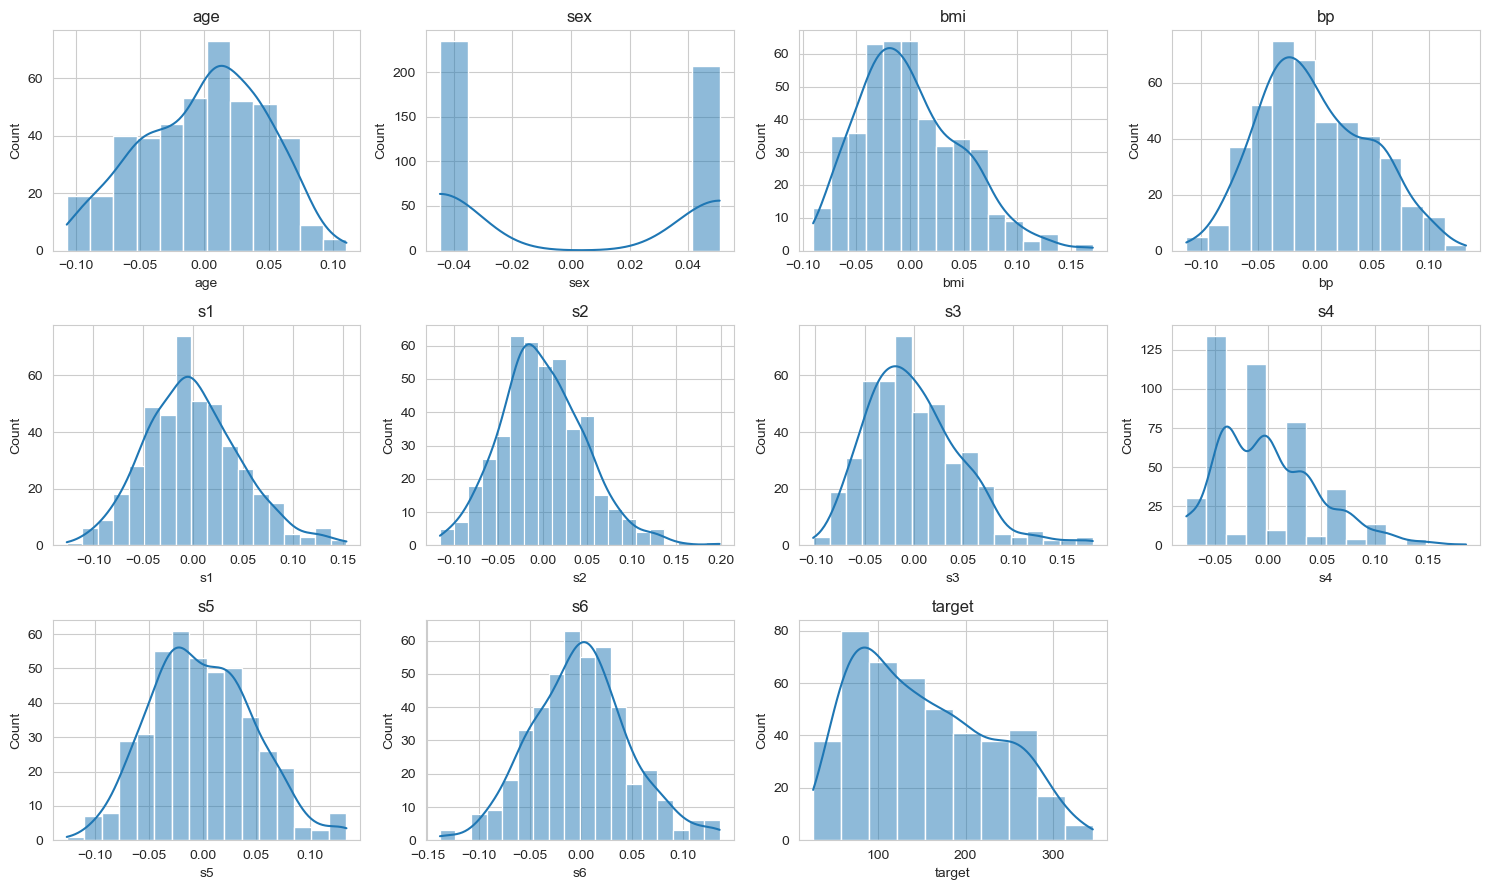

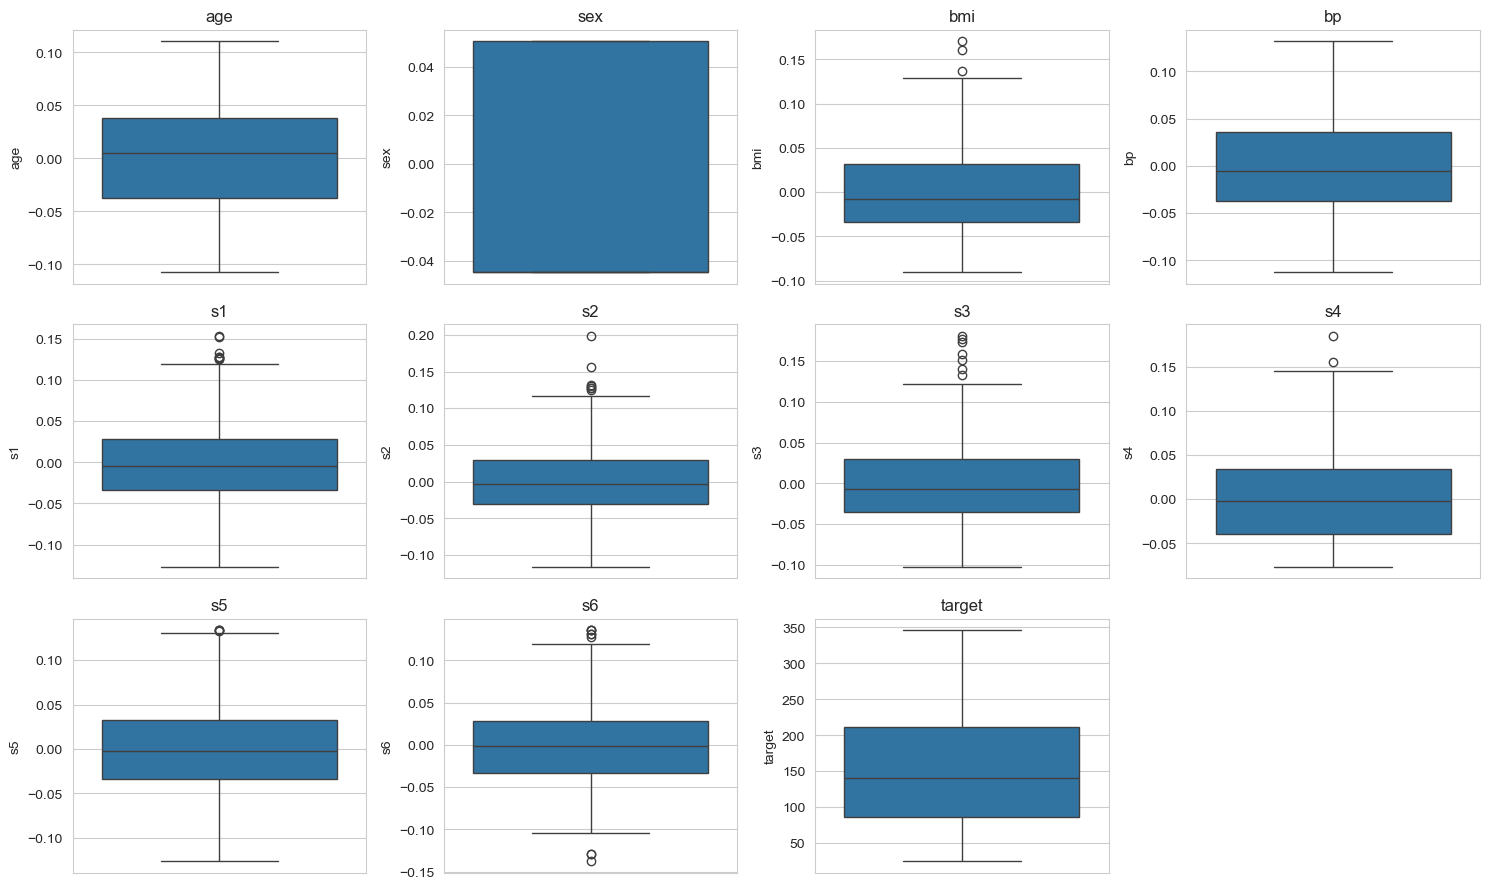

In [7]:
# Ottiengo i nomi di tutte le colonne, inclusa la colonna target
all_cols = df.columns

# Definisco il numero di righe e colonne per i subplot
n_cols = 4
n_rows = (len(all_cols) + n_cols - 1) // n_cols

# Crea istogrammi per ciascuna variabile
plt.figure(figsize=(15, n_rows * 3))
for i, col in enumerate(all_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Box plot per identificare gli outlier
plt.figure(figsize=(15, n_rows * 3))
for i, col in enumerate(all_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Analisi Approfondita dei Grafici di Distribuzione Univariata (Istogrammi e Box Plot)

Procedo con un'analisi dettagliata dei grafici di distribuzione univariata per ottenere una comprensione più profonda delle caratteristiche di ciascuna variabile predittiva e della variabile target nel dataset sul diabete.

Osservando gli **Istogrammi**:

*   **Distribuzione delle Variabili Predittive:** La maggior parte delle variabili predittive ('age', 'bmi', 'bp', 's1', 's2', 's3', 's5', 's6') mostrano distribuzioni che si avvicinano a una campana (distribuzione normale), sebbene alcune presentino una leggera asimmetria. Questo è un aspetto positivo per molti modelli lineari che assumono la normalità dei predittori.
*   **Variabile 'sex':** L'istogramma per 'sex' conferma che si tratta di una variabile binaria, con due picchi distinti che rappresentano i due sessi nel dataset. La frequenza dei due gruppi sembra essere relativamente bilanciata, anche se uno potrebbe essere leggermente più numeroso.
*   **Variabile 's4':** L'istogramma per 's4' mostra una distribuzione con più picchi (multimodale) o una forma meno regolare rispetto alle altre variabili. Questo suggerisce che 's4' potrebbe avere una struttura sottostante più complessa o rappresentare una combinazione di effetti.
*   **Variabile 'target':** L'istogramma per la variabile target (progressione del diabete) tende ad essere spostato verso valori più bassi e presenta una coda lunga verso destra. Questo indica che la maggior parte dei pazienti ha un livello di progressione del diabete relativamente basso dopo un anno, ma ci sono anche alcuni pazienti con una progressione significativamente più alta. Questa distribuzione asimmetrica della target potrebbe suggerire di considerare trasformazioni (come il logaritmo) se si utilizzano modelli che assumono una distribuzione più simmetrica della variabile dipendente, sebbene i modelli lineari generalizzati possano gestire questo tipo di distribuzione.

Osservando i **Box Plot**:

*   **Centratura e Scala:** I box plot confermano visivamente che tutte le variabili predittive sono state centrate sulla media (la maggior parte delle mediane è vicina allo zero) e scalate. L'intervallo dei valori è simile tra le diverse variabili predittive.
*   **Identificazione Outlier:** I box plot sono particolarmente efficaci nel mostrare la presenza di potenziali outlier, rappresentati dai punti individuali al di fuori dei "baffi" di ciascun box plot. Diverse variabili ('bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6') presentano outlier. Questi outlier potrebbero rappresentare osservazioni reali con valori estremi o potenziali errori di misurazione.

In sintesi, l'analisi univariata ha permesso di valutare la forma della distribuzione di ciascuna variabile, confermare la scalatura e la centratura, e identificare la presenza di outlier.

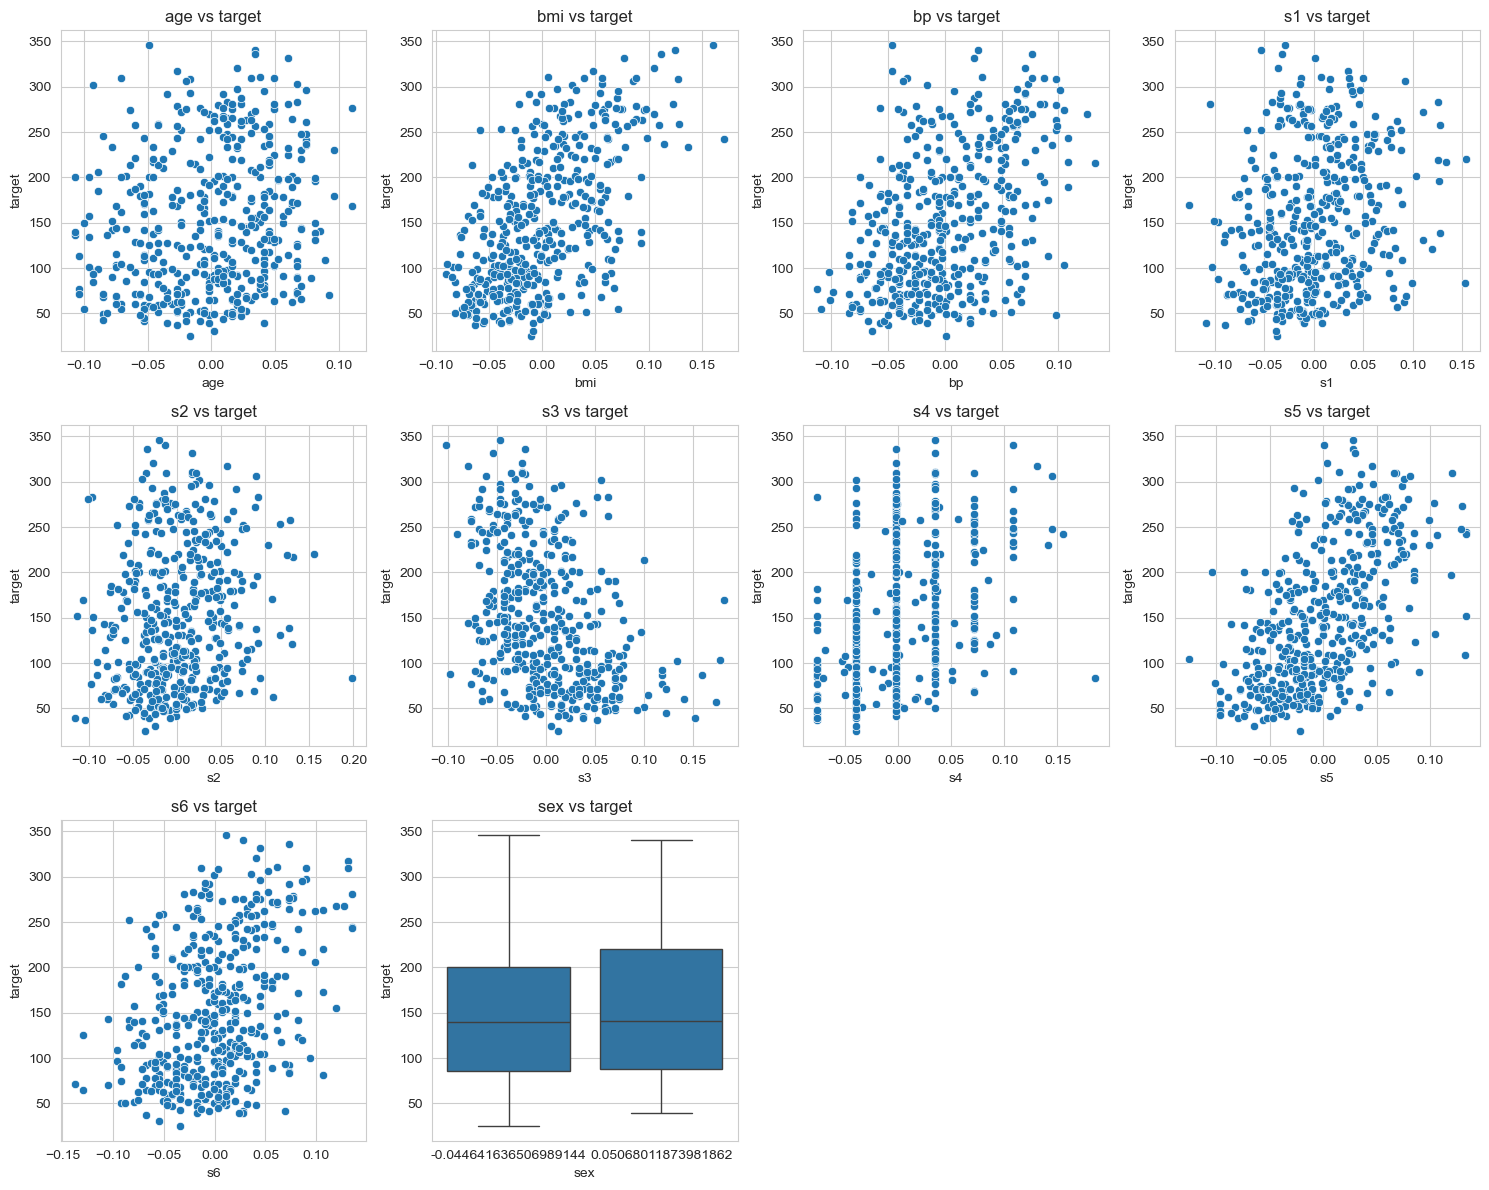

In [8]:
# Ottengo i nomi delle colonne predittive
features = df.columns[:-1]
target = 'target'

# Creo i grafici a dispersione per le variabili predittive continue vs la variabile target
# e un box plot per la variabile categorica 'sex' vs target

# Rimuovo 'sex' dalla lista delle features per gli scatter plot
features_for_scatter = [col for col in features if col != 'sex']

# Calcolail numero di subplot necessari
n_scatter_plots = len(features_for_scatter)
n_total_plots = n_scatter_plots + 1 # +1 per il box plot di 'sex'

# Definisce il numero di righe e colonne per i subplot
n_cols = 4
n_rows = (n_total_plots + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 4))

# Crea grafici a dispersione
for i, col in enumerate(features_for_scatter):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=df[col], y=df[target])
    plt.title(f'{col} vs {target}')
    plt.xlabel(col)
    plt.ylabel(target)

# Crea un box plot per 'sex' vs target
plt.subplot(n_rows, n_cols, n_scatter_plots + 1)
sns.boxplot(x=df['sex'], y=df[target])
plt.title(f'sex vs {target}')
plt.xlabel('sex')
plt.ylabel(target)


plt.tight_layout()
plt.show()

### Analisi Approfondita dei Grafici a Dispersione (Scatter Plot) vs Target

Procedo con un'analisi più dettagliata dei grafici a dispersione per comprendere meglio le relazioni tra le variabili predittive e la variabile target (progressione del diabete)

Osservando i grafici:

*   **Variabili con Correlazione Positiva Evidente ('bmi', 'bp', 's5', 's6'):** Le variabili 'bmi', 'bp', 's5' (possibilmente logaritmo dei trigliceridi sierici) e 's6' (livello di zucchero nel sangue) mostrano una chiara tendenza lineare positiva con la variabile target. Questo indica che all'aumentare dei valori di queste variabili, tende ad aumentare anche la progressione del diabete. Questa osservazione è cruciale: suggerisce che queste features sono probabilmente importanti predittori della progressione della malattia. Per un modello lineare, questa relazione possono essere determinanti.
*   **Variabili con Correlazione Meno Evidente o Non Lineare ('age', 's1', 's2', 's3', 's4'):** Le variabili 'age', 's1' (colesterolo sierico totale), 's2' (lipoproteine a bassa densità), 's3' (lipoproteine ad alta densità) e 's4' (colesterolo totale / HDL) presentano una dispersione maggiore dei punti. Le relazioni con la target non appaiono strettamente lineari o la correlazione è meno forte.
    *   'age' mostra una dispersione piuttosto uniforme, suggerendo che l'età da sola potrebbe non essere un forte predittore lineare in questo dataset scalato.
    *   's1', 's2', 's3', e 's4' (che sono misurazioni sieriche correlate al colesterolo) mostrano pattern più complessi. 's3' sembra avere una leggera tendenza negativa in alcune aree, il che potrebbe essere interessante da esplorare ulteriormente (un aumento di HDL è generalmente positivo per la salute cardiovascolare, quindi una correlazione negativa con la progressione del diabete avrebbe senso biologico). 's4' mostra una struttura a bande verticali, che potrebbe indicare una relazione non lineare o l'interazione con altre variabili.
*   **Variabile Categorica ('sex'):** Il box plot per la variabile 'sex' confronta la distribuzione della variabile target tra i due gruppi sessuali rappresentati dai valori scalati (uno negativo e uno positivo). Osservando il grafico, sembra esserci una leggera differenza nelle mediane tra i due gruppi, con il gruppo rappresentato dal valore positivo che mostra una mediana e una dispersione della progressione del diabete leggermente superiori rispetto al gruppo rappresentato dal valore negativo. Tuttavia, l'intervallo dei valori si sovrappone considerevolmente tra i due gruppi, suggerendo che, sebbene possa esserci una tendenza, la variabile 'sex' da sola potrebbe non essere un predittore estremamente forte della progressione del diabete in questo dataset.
*   **Outlier e Impatto Potenziale:** La presenza di outlier, visibili come punti isolati nei grafici, in particolare in variabili come 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5' e 's6', merita attenzione. Gli outlier possono influenzare significativamente i modelli di regressione lineare e altri algoritmi sensibili ai valori estremi.

**Considerazioni per la Modellazione:**

Queste visualizzazioni suggeriscono che un modello lineare potrebbe catturare bene la relazione con 'bmi', 'bp', 's5', e 's6'. Per le altre variabili, potrebbe essere necessario considerare:
*   **Modelli non lineari:** Utilizzare algoritmi di machine learning che possono catturare relazioni complesse e non lineari (es. random forest).
*   **Interazioni tra variabili:** Esplorare se la combinazione di due o più variabili predittive ha un impatto sulla target diverso dalla somma dei loro effetti individuali.

In conclusione, questa analisi bivariata preliminare evidenzia quali variabili hanno il potenziale maggiore come predittori lineari della progressione del diabete e quali richiedono un'esplorazione o un trattamento più sofisticato in fase di modellazione.

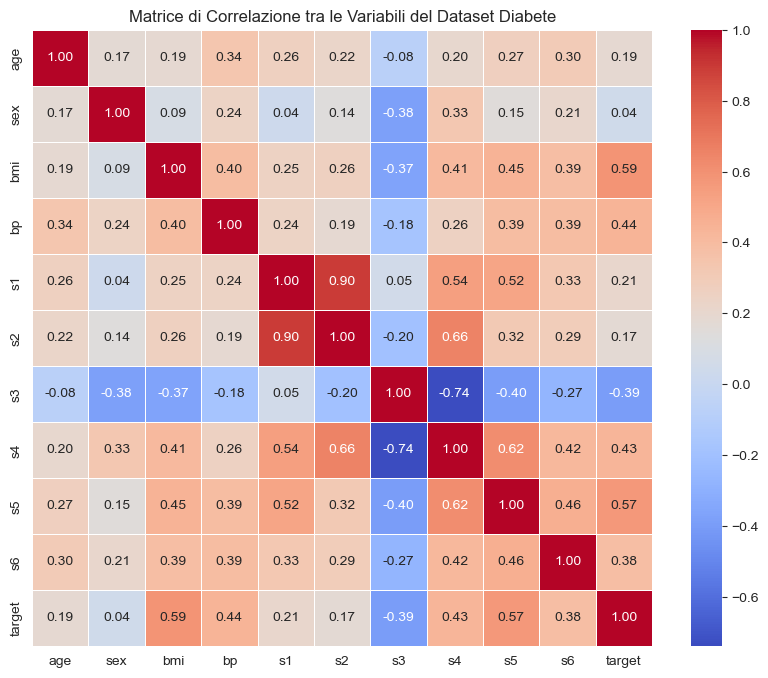

In [9]:
# Calcola la matrice di correlazione
correlation_matrix = df.corr()

# Crea la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice di Correlazione tra le Variabili del Dataset Diabete')
plt.show()

### Analisi Approfondita della Matrice di Correlazione (Heatmap)

L'heatmap della matrice di correlazione fornisce una visione quantitativa delle relazioni lineari tra tutte le coppie di variabili nel dataset sul diabete. I valori nelle celle rappresentano il coefficiente di correlazione di Pearson, che varia da -1 a +1. Valori più vicini a +1 indicano una forte correlazione lineare positiva, valori più vicini a -1 indicano una forte correlazione lineare negativa, e valori vicini a 0 indicano una debole o nessuna correlazione lineare.

Osservando la heatmap:

*   **Correlazioni con la Variabile Target ('target'):**
    *   Visivamente e quantitativamente le osservazioni dai grafici a dispersione: le variabili 'bmi' (0.59), 's5' (0.57), 'bp' (0.44) e 's6' (0.38) mostrano le correlazioni positive più forti con la variabile target. Questo rafforza l'idea che queste siano tra i predittori più importanti della progressione del diabete in questo dataset.
    *   La variabile 's3' (-0.39) mostra una correlazione negativa moderatamente forte con la target, il che è biologicamente plausibile dato che 's3' rappresenta l'HDL (colesterolo "buono").
    *   Le altre variabili ('age', 'sex', 's1', 's2', 's4') mostrano correlazioni più deboli con la target, con 'sex' che ha la correlazione lineare più bassa (0.043), confermando che il sesso da solo ha una relazione lineare molto debole con la progressione del diabete in questo dataset scalato.

*   **Correlazioni tra Variabili Predittive (Multicollinearità):**
    *   È importante esaminare le correlazioni tra le variabili predittive per identificare la multicollinearità, che può influenzare alcuni modelli di regressione lineare.
    *   Osserviamo alcune correlazioni piuttosto forti tra le variabili predittive stesse. Le correlazioni più notevoli includono:
        *   's1' e 's2' (0.90): Questo è un valore molto alto e indica una forte correlazione lineare tra queste due variabili.
        *   's1' e 's4' (0.54)
        *   's1' e 's5' (0.52)
        *   's2' e 's4' (0.66)
        *   's2' e 's5' (0.32)
        *   's3' e 's4' (-0.74): Una forte correlazione negativa.
        *   's3' e 's5' (-0.40)
        *   's4' e 's5' (0.62)
    *   Queste forti correlazioni tra le variabili sieriche ('s1', 's2', 's3', 's4', 's5') non sono sorprendenti, dato che rappresentano diverse misurazioni correlate al profilo lipidico e al metabolismo. Tuttavia, un'elevata multicollinearità (come tra 's1' e 's2') potrebbe creare problemi nell'interpretazione dei coefficienti in un modello di regressione lineare standard. Potrebbe essere necessario considerare tecniche per gestire la multicollinearità (ad esempio regressione Ridge o Lasso).


In sintesi, la heatmap conferma le relazioni bivariate osservate in precedenza e aggiunge una dimensione quantitativa, oltre a rivelare le interazioni tra le variabili predittive stesse, evidenziando il potenziale problema della multicollinearità.

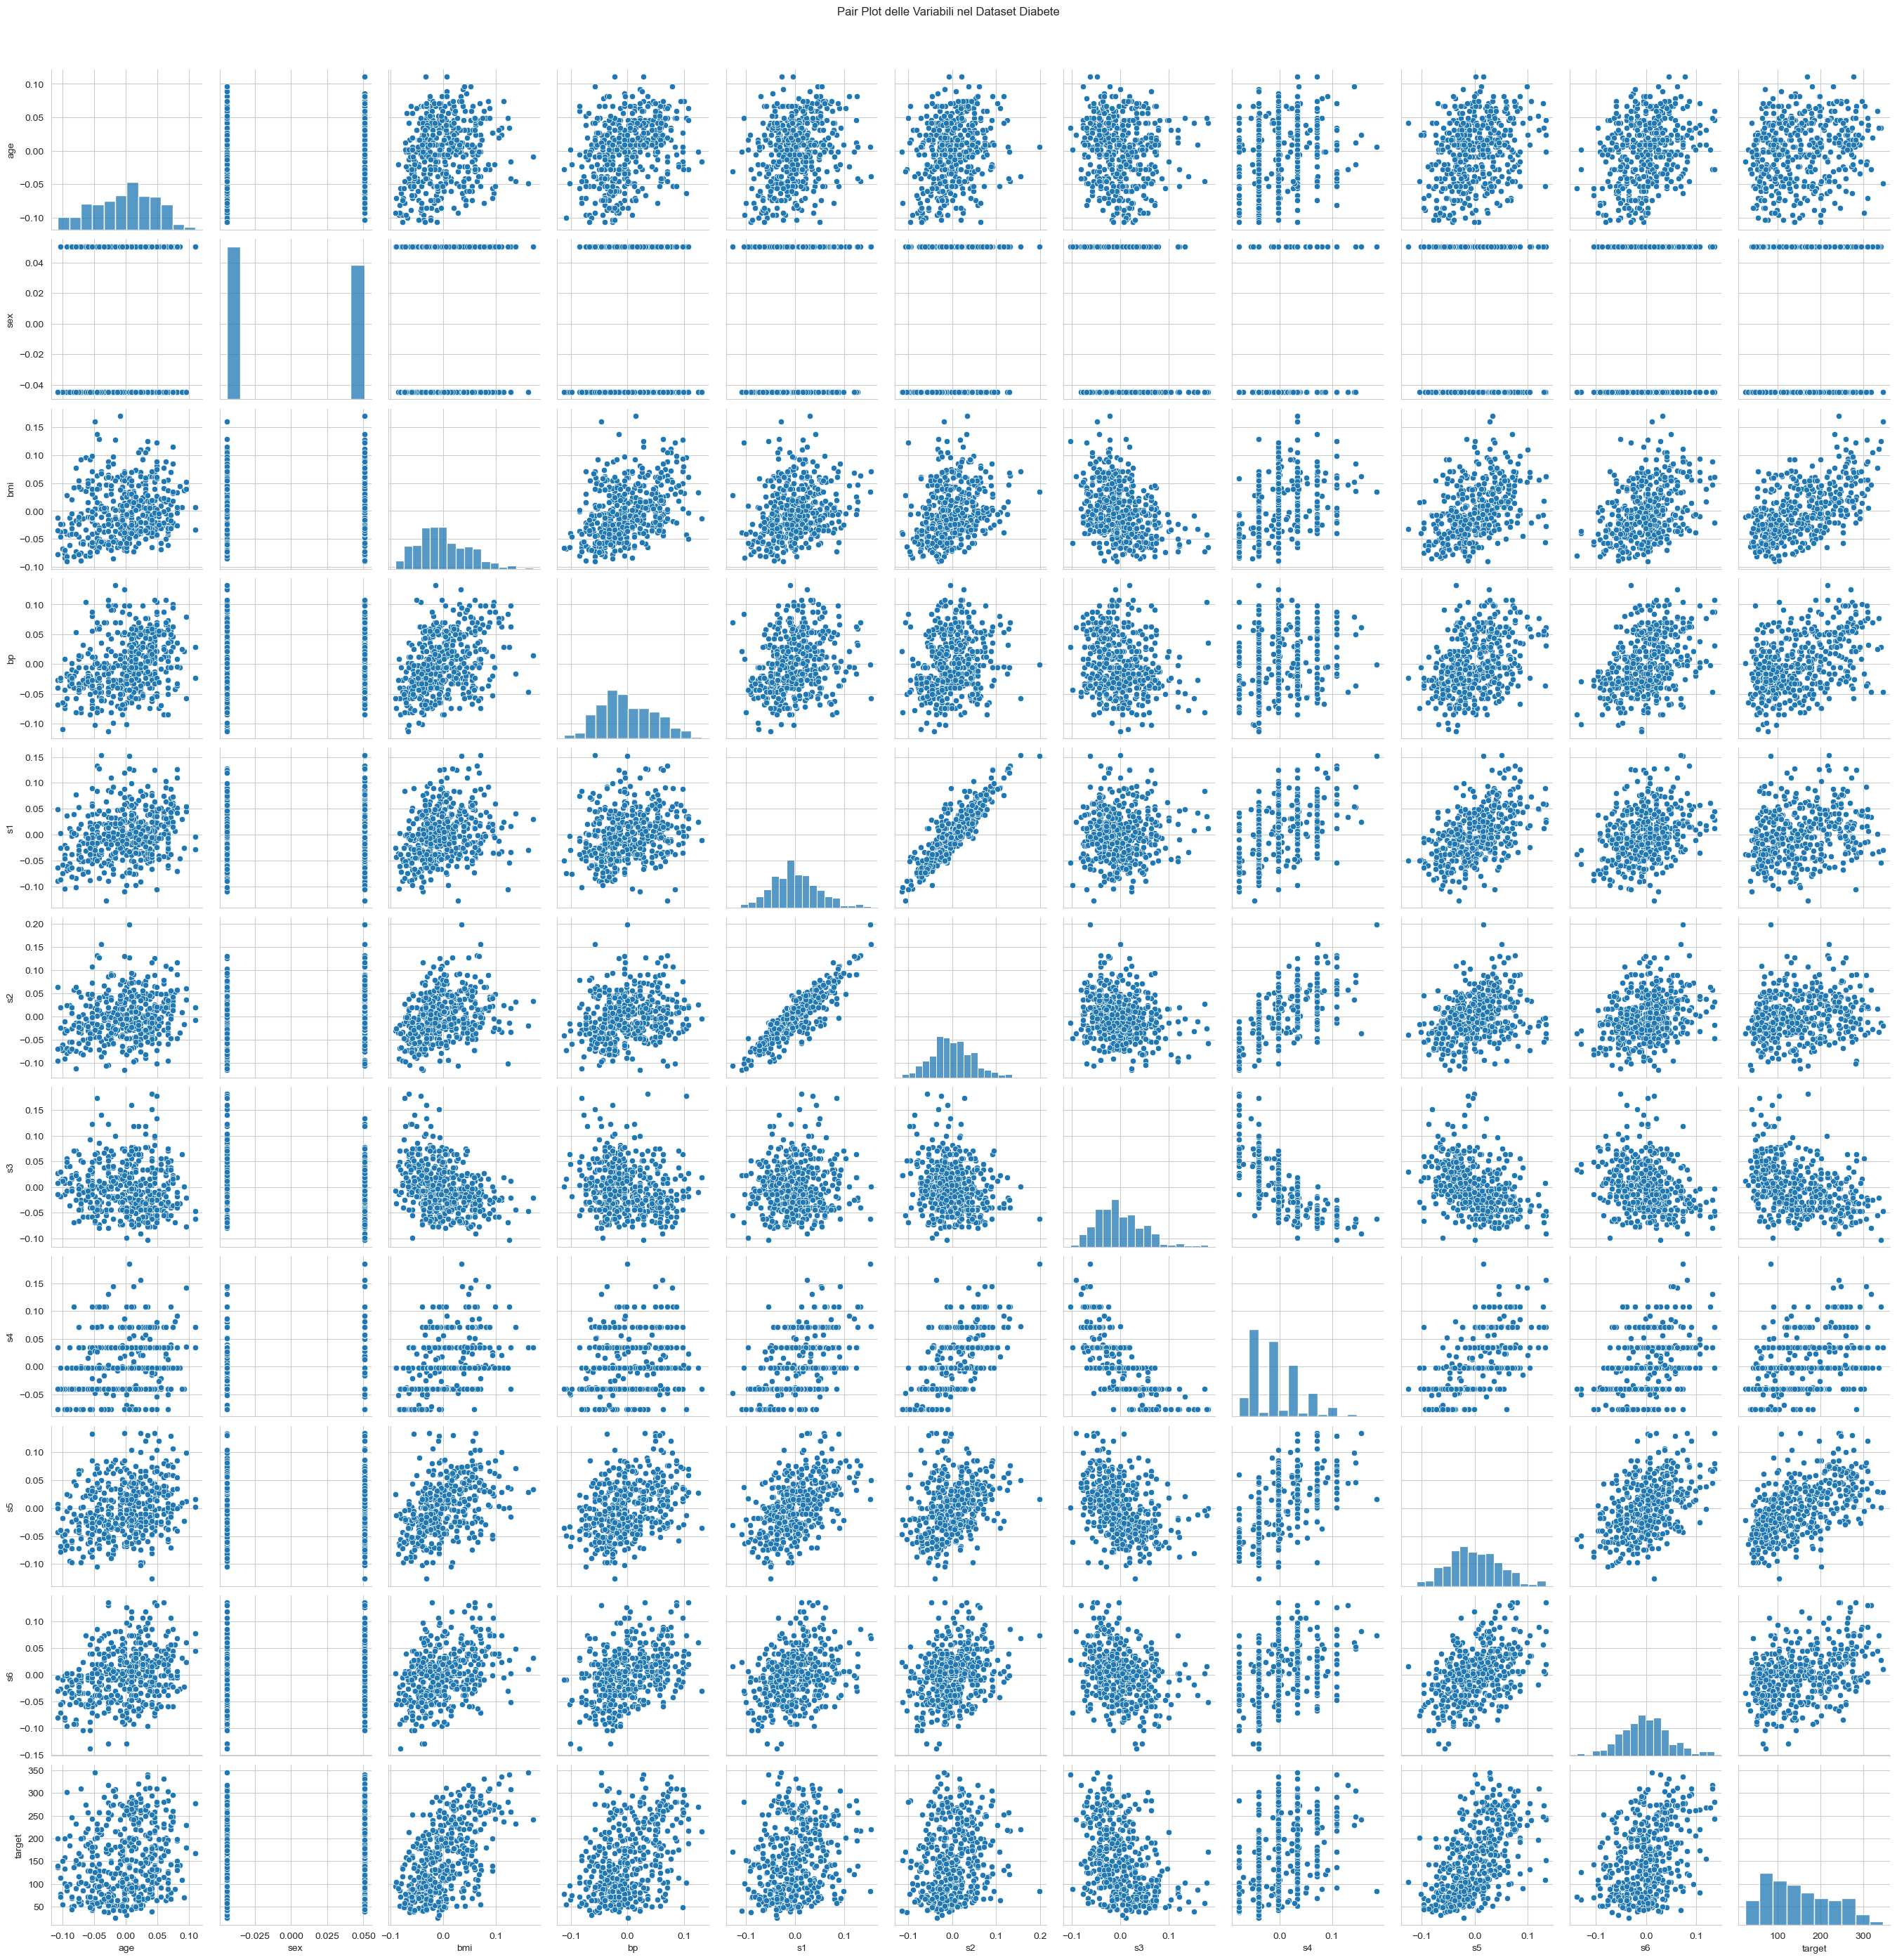

In [10]:
# Crea il pair plot
sns.pairplot(df)
plt.suptitle('Pair Plot delle Variabili nel Dataset Diabete', y=1.02)
plt.show()

### Analisi Approfondita del Pair Plot

Il pair plot è uno strumento di visualizzazione molto potente che permette di esaminare contemporaneamente le distribuzioni univariate di ciascuna variabile (sulla diagonale) e le relazioni bivariate (grafici a dispersione) tra ogni coppia di variabili. Questa visione d'insieme è fondamentale per comprendere la struttura complessiva del dataset e le interazioni tra le sue componenti.

Osservando il pair plot:

*   **Diagonale (Distribuzioni Univariate):** Sulla diagonale principale del pair plot, troviamo gli istogrammi per ciascuna variabile. Questi confermano visivamente le osservazioni fatte durante l'analisi univariata: la maggior parte delle variabili predittive ha distribuzioni che si avvicinano alla normalità, 'sex' è chiaramente binaria, 's4' mostra una distribuzione meno regolare, e la variabile target è spostata verso valori bassi con una coda a destra. Questi istogrammi sulla diagonale servono come un rapido riassunto delle distribuzioni individuali.

*   **Grafici Off-Diagonale (Relazioni Bivariate):** I grafici a dispersione al di fuori della diagonale mostrano le relazioni tra ogni coppia di variabili.
    *   **Relazioni con la Target:** Le colonne e le righe corrispondenti alla variabile 'target' (l'ultima colonna e l'ultima riga) replicano essenzialmente i grafici a dispersione che abbiamo analizzato in precedenza. Confermano visivamente che 'bmi', 'bp', 's5' e 's6' mostrano le correlazioni positive più evidenti con la progressione del diabete, mentre 's3' sembra avere una relazione negativa. Le altre variabili mostrano relazioni lineari più deboli con la target.
    *   **Relazioni tra Variabili Predittive (Multicollinearità Visiva):** I grafici a dispersione tra le variabili predittive stesse sono cruciali per identificare visivamente la multicollinearità. Si possono notare le forti relazioni lineari tra diverse coppie di variabili sieriche ('s1', 's2', 's3', 's4', 's5'). Ad esempio, la relazione tra 's1' e 's2' appare come una nuvola di punti molto stretta e allungata, indicando una correlazione lineare molto forte, in linea con il valore di correlazione di 0.90 visto nella heatmap. Allo stesso modo, le relazioni tra 's3' e 's4' mostrano una chiara tendenza negativa. Queste visualizzazioni rafforzano la presenza di multicollinearità tra queste variabili.


In conclusione, il pair plot fornisce una mappa completa delle relazioni nel dataset. Permette di vedere sia le distribuzioni individuali che le interazioni a coppie, confermando le precedenti scoperte e evidenziando ulteriormente le aree (come la multicollinearità) che richiederanno attenzione nella fase di preparazione dei dati e nella scelta del modello.

### Considerazioni e Approcci per la Modellazione basati sull'EDA

Basandomi sull'analisi esplorativa dei dati condotta finora, in particolare osservando la distribuzione delle variabili, le relazioni bivariate e la presenza di potenziali outlier nei dati scalati e centrati, possio delineare alcune considerazioni chiave per la fase di modellazione:

1.  **Natura dei Dati Scalati e Outlier:** Dato che i dati sono già stati scalati e centrati e provengono da misurazioni mediche, è difficile determinare con certezza se i punti identificati come outlier nei box plot rappresentino valori reali estremi o possibili errori. Senza una conoscenza approfondita del dominio, rimuovere o modificare questi punti potrebbe comportare la perdita di informazioni preziose.

2.  **Sensibilità dei Modelli agli Outlier:** Alcuni modelli di regressione, come la regressione lineare standard, sono sensibili ai valori estremi che possono influenzare in modo significativo la stima dei coefficienti.

3.  **Multicollinearità:** La heatmap ha evidenziato una forte correlazione tra alcune variabili predittive (in particolare tra le misurazioni sieriche), suggerendo la presenza di multicollinearità che può influenzare l'interpretabilità e la stabilità dei modelli lineari standard.

Alla luce di queste considerazioni, è prudente scegliere o considerare modelli che siano meno sensibili agli outlier e/o in grado di gestire la multicollinearità. Gli approcci che confronterò includono:

*   **Random Forest Regressor:** Un modello ensemble basato su alberi decisionali che è generalmente robusto agli outlier e non risente in modo significativo della multicollinearità. È efficace nel catturare relazioni non lineari.
*   **Lasso Regressor:** Un modello di regressione lineare regolarizzato che aggiunge una penalità L1 sui coefficienti, forzando alcuni di essi a zero e ottenendo così una selezione automatica delle feature. È particolarmente utile quando si hanno molte variabili e si desidera identificare quelle più rilevanti, creando modelli più interpretabili e parsimoniosi rispetto alla regressione lineare classica.
*   **Support Vector Regressor (SVR):** Un modello che può catturare relazioni complesse e, a seconda dell'implementazione e dei parametri, può essere meno influenzato dagli outlier rispetto alla regressione lineare standard definendo un margine di tolleranza.



## Test Modelli scelti

In [11]:
# Definisco le feature (X) e la variabile target (y)
X = df.drop('target', axis=1)
y = df['target']

# Divido il dataset in set di addestramento e test
# Utilizzo una proporzione comune come 80% addestramento e 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensioni del set di addestramento (X_train, y_train):", X_train.shape, y_train.shape)
print("Dimensioni del set di test (X_test, y_test):", X_test.shape, y_test.shape)

Dimensioni del set di addestramento (X_train, y_train): (353, 10) (353,)
Dimensioni del set di test (X_test, y_test): (89, 10) (89,)


In [12]:
# Divido ulteriormente il set di addestramento (X_train, y_train)
# in set di addestramento (X_train_split, y_train_split) e validazione (X_val, y_val)

X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Dimensioni del set di addestramento splittato (X_train_split, y_train_split):", X_train_split.shape, y_train_split.shape)
print("Dimensioni del set di validazione (X_val, y_val):", X_val.shape, y_val.shape)
print("Dimensioni del set di test (X_test, y_test):", X_test.shape, y_test.shape)

Dimensioni del set di addestramento splittato (X_train_split, y_train_split): (282, 10) (282,)
Dimensioni del set di validazione (X_val, y_val): (71, 10) (71,)
Dimensioni del set di test (X_test, y_test): (89, 10) (89,)


## Lasso

In [13]:
# Ho creato una pipeline: prima scala (opzionale in questo caso) e poi applica Lasso
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()), # Incluso per buona pratica, anche se i dati sono già scalati
    ('lasso', Lasso(random_state=42))
])

# Ho definito una griglia di parametri per Lasso da ottimizzare
param_grid_lasso = {
    'lasso__alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0]
}

# Ho creato l'oggetto GridSearchCV
grid_search_lasso = GridSearchCV(estimator=pipeline_lasso,
                                 param_grid=param_grid_lasso,
                                 cv=5, # Uso 5-fold cross-validation sul training split
                                 scoring='neg_mean_squared_error', # Uso MSE (negato) come metrica
                                 n_jobs=-1)

# Ho eseguito la Grid Search sul set di addestramento splittato
grid_search_lasso.fit(X_train_split, y_train_split)

# Visualizzo i risultati
print("Migliori parametri per Lasso :", grid_search_lasso.best_params_)
print("Miglior punteggio (neg_mean_squared_error) con Lasso :", grid_search_lasso.best_score_)

# Ottengo il modello migliore addestrato
best_lasso_model = grid_search_lasso.best_estimator_
print("\nModello Lasso migliore (addestrato con i migliori parametri):", best_lasso_model)

# Valuto il modello migliore sul set di validazione (valutazione su dati non visti durante l'addestramento e l'ottimizzazione)
y_pred_lasso_val = best_lasso_model.predict(X_val)
mse_lasso_val = mean_squared_error(y_val, y_pred_lasso_val)
mae_lasso_val = mean_absolute_error(y_val, y_pred_lasso_val)
r2_lasso_val = r2_score(y_val, y_pred_lasso_val)

print(f"\nPerformance finale di Lasso (MSE sul set di validazione): {mse_lasso_val:.4f}")
print(f"Performance finale di Lasso (MAE sul set di validazione): {mae_lasso_val:.4f}")
print(f"Performance finale di Lasso (R^2 sul set di validazione): {r2_lasso_val:.4f}")

Migliori parametri per Lasso : {'lasso__alpha': 1.0}
Miglior punteggio (neg_mean_squared_error) con Lasso : -3202.6795981679074

Modello Lasso migliore (addestrato con i migliori parametri): Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', Lasso(random_state=42))])

Performance finale di Lasso (MSE sul set di validazione): 2847.9379
Performance finale di Lasso (MAE sul set di validazione): 44.4041
Performance finale di Lasso (R^2 sul set di validazione): 0.4703


## SVR

In [14]:
# Ho creato una pipeline: prima scala (utile per SVR) e poi applico SVR
pipeline_svr = Pipeline([
    ('scaler', StandardScaler()), # La scalatura è importante per SVR
    ('svr', SVR())
])

# Ho definito una griglia di parametri per SVR da ottimizzare
# C: parametro di regolarizzazione (influenza il compromesso bias/variance)
# epsilon: parametro che definisce la banda di tolleranza attorno alla previsione
# kernel: tipo di kernel (lineare, polinomiale, RBF, sigmoid, ecc.)
param_grid_svr = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__epsilon': [0.01, 0.1, 0.5, 1.0],
    'svr__kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Ho creato l'oggetto GridSearchCV
grid_search_svr = GridSearchCV(estimator=pipeline_svr,
                               param_grid=param_grid_svr,
                               cv=5, # Uso 5-fold cross-validation sul training split
                               scoring='neg_mean_squared_error', # Uso MSE (negato) come metrica
                               n_jobs=-1)

# Ho eseguito la Grid Search sul set di addestramento splittato
grid_search_svr.fit(X_train_split, y_train_split)

# Visualizzo i risultati
print("Migliori parametri per SVR:", grid_search_svr.best_params_)
print("Miglior punteggio (neg_mean_squared_error) con SVR:", grid_search_svr.best_score_)

# Modello migliore addestrato
best_svr_model = grid_search_svr.best_estimator_
print("\nModello SVR migliore (addestrato con i migliori parametri):", best_svr_model)

# E valuto il modello migliore sul set di validazione (valutazione su dati non visti durante l'addestramento e l'ottimizzazione)

y_pred_svr_val = best_svr_model.predict(X_val)
mse_svr_val = mean_squared_error(y_val, y_pred_svr_val)
mae_svr_val = mean_absolute_error(y_val, y_pred_svr_val)
r2_svr_val = r2_score(y_val, y_pred_svr_val)

print(f"\nPerformance finale di SVR (MSE sul set di validazione): {mse_svr_val:.4f}")
print(f"Performance finale di SVR (MAE sul set di validazione): {mae_svr_val:.4f}")
print(f"Performance finale di SVR (R^2 sul set di validazione): {r2_svr_val:.4f}")

# Aggiungo i risultati al dizionario tuned_results
if 'tuned_results' not in locals():
    tuned_results = {}

tuned_results['SVR_GS'] = {
    'best_params': grid_search_svr.best_params_,
    'best_cv_score': grid_search_svr.best_score_,
    'mse_val': mse_svr_val,
    'mae_val': mae_svr_val,
    'r2_val': r2_svr_val,
    'model': best_svr_model
}

Migliori parametri per SVR: {'svr__C': 1, 'svr__epsilon': 0.01, 'svr__kernel': 'linear'}
Miglior punteggio (neg_mean_squared_error) con SVR: -3224.8841903135108

Modello SVR migliore (addestrato con i migliori parametri): Pipeline(steps=[('scaler', StandardScaler()),
                ('svr', SVR(C=1, epsilon=0.01, kernel='linear'))])

Performance finale di SVR (MSE sul set di validazione): 3085.0235
Performance finale di SVR (MAE sul set di validazione): 46.5259
Performance finale di SVR (R^2 sul set di validazione): 0.4262


## Random Forest Regressor

In [15]:
# Ho creato una pipeline: (scalatura opzionale) e poi applica Random Forest Regressor
# Random Forest non è sensibile alla scalatura delle feature, ma la includo
# nella pipeline per coerenza con gli altri modelli e per future modifiche
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42)) # random_state per riproducibilità
])

# Ho definito una griglia di parametri per Random Forest Regressor da ottimizzare
# n_estimators: numero di alberi nella foresta
# max_features: numero di feature da considerare per il miglior split (sqrt è comune per regressione)
# min_samples_split: numero minimo di campioni richiesti per splittare un nodo interno
# min_samples_leaf: numero minimo di campioni richiesti in un nodo foglia
param_grid_rf = {
    'rf__n_estimators': [100, 200, 300], # Numero di alberi
    'rf__max_features': [None, 'sqrt', 'log2'], # Strategia per il numero di feature
    'rf__min_samples_split': [2, 5, 10], # Min campioni per split
    'rf__min_samples_leaf': [1, 2, 4] # Min campioni nel nodo foglia
}

# Ho creato l'oggetto GridSearchCV
grid_search_rf = GridSearchCV(estimator=pipeline_rf,
                              param_grid=param_grid_rf,
                              cv=5, # Uso 5-fold cross-validation sul training split
                              scoring='neg_mean_squared_error', # Uso MSE (negato) come metrica
                              n_jobs=-1)

# Ho eseguito la Grid Search sul set di addestramento splittato
grid_search_rf.fit(X_train_split, y_train_split)

# Visualizzo i risultati
print("Migliori parametri per Random Forest Regressor :", grid_search_rf.best_params_)
print("Miglior punteggio (neg_mean_squared_error) con Random Forest Regressor :", grid_search_rf.best_score_)

# Posso anche ottenere il modello migliore addestrato
best_rf_model = grid_search_rf.best_estimator_
print("\nModello Random Forest Regressor migliore (addestrato con i migliori parametri):", best_rf_model)

# E valuto il modello migliore sul set di validazione (valutazione su dati non visti durante l'addestramento e l'ottimizzazione)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_rf_val = best_rf_model.predict(X_val)
mse_rf_val = mean_squared_error(y_val, y_pred_rf_val)
mae_rf_val = mean_absolute_error(y_val, y_pred_rf_val)
r2_rf_val = r2_score(y_val, y_pred_rf_val)

print(f"\nPerformance finale di Random Forest Regressor (MSE sul set di validazione): {mse_rf_val:.4f}")
print(f"Performance finale di Random Forest Regressor (MAE sul set di validazione): {mae_rf_val:.4f}")
print(f"Performance finale di Random Forest Regressor (R^2 sul set di validazione): {r2_rf_val:.4f}")

Migliori parametri per Random Forest Regressor : {'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Miglior punteggio (neg_mean_squared_error) con Random Forest Regressor : -3369.6013388858846

Modello Random Forest Regressor migliore (addestrato con i migliori parametri): Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_features='sqrt', min_samples_leaf=2,
                                       n_estimators=200, random_state=42))])

Performance finale di Random Forest Regressor (MSE sul set di validazione): 2943.7469
Performance finale di Random Forest Regressor (MAE sul set di validazione): 45.5806
Performance finale di Random Forest Regressor (R^2 sul set di validazione): 0.4525


### Analisi e Spiegazione Risultati dei Modelli e Scelta per il Proseguimento

Dopo aver addestrato e ottimizzato tre modelli di regressione (Lasso, SVR e Random Forest Regressor) sul set di addestramento splittato e valutato le loro performance sul set di validazione, analizzo i risultati per decidere quale modello proseguire per ulteriori miglioramenti.

**Riepilogo delle Performance sul Set di Validazione:**

*   **Lasso (senza feature aggiunte):**
    *   MSE (Mean Squared Error): 2847.9379
    *   MAE (Mean Absolute Error): 44.4041
    *   R² (R-squared): 0.4703
    *   Migliori parametri: `{'lasso__alpha': 1.0}`

*   **SVR (senza feature aggiunte):**
    *   MSE (Mean Squared Error): 3085.0235
    *   MAE (Mean Absolute Error): 46.5259
    *   R² (R-squared): 0.4262
    *   Migliori parametri: `{'svr__C': 1, 'svr__epsilon': 0.01, 'svr__kernel': 'linear'}`

*   **Random Forest Regressor (senza feature aggiunte):**
    *   MSE (Mean Squared Error): 2943.7469
    *   MAE (Mean Absolute Error): 45.5806
    *   R² (R-squared): 0.4525
    *   Migliori parametri: `{'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}`

**Analisi e Confronto dei Risultati:**

Osservando le metriche sul set di validazione

*   **MSE (Mean Squared Error):** Il Lasso Regressor ha il MSE più basso (2847.94), il che significa che, in media, i suoi errori al quadrato sono i più piccoli rispetto a SVR e Random Forest. Un MSE più basso indica che le previsioni del modello sono più vicine ai valori reali.
*   **MAE (Mean Absolute Error):** Anche per il MAE, il Lasso Regressor (44.40) ottiene il risultato migliore. Questo significa che, in media, l'errore assoluto tra la previsione del modello e il valore reale è il più basso. Il MAE è una metrica più interpretabile del MSE perché è nella stessa unità della variabile target. Un MAE di circa 44 suggerisce che le previsioni del Lasso sono, in media, a circa 44 unità di distanza dalla progressione reale del diabete.
*   **R² (R-squared):** Il Lasso Regressor ha il valore di R² più alto (0.4703). L'R² rappresenta la proporzione della varianza nella variabile target che è spiegata dal modello. Un R² di 0.47 significa che il Lasso Regressor è in grado di spiegare circa il 47% della variabilità nella progressione del diabete utilizzando le feature predittive. Questo valore non è estremamente alto, il che suggerisce che c'è ancora una parte significativa della varianza non spiegata dai modelli attuali, o che il dataset presenta una certa variabilità intrinseca non catturabile dalle feature disponibili o dai modelli lineari/semi-lineari.

**Decisione sul Modello da Proseguire:**

Basandomi sulle metriche di performance sul set di validazione, il **Lasso Regressor** ha ottenuto i risultati migliori in termini di MSE, MAE e R². Sebbene le differenze con Random Forest non siano enormi, Lasso dimostra una leggera superiorità in questa fase.

Inoltre, ci sono ragioni teoriche per preferire un modello lineare regolarizzato come Lasso, specialmente considerando la multicollinearità osservate nell'EDA. Lasso, attraverso la sua penalità L1, non solo riduce i coefficienti delle feature meno importanti, ma può anche portare alcuni coefficienti a zero, realizzando una sorta di selezione automatica delle feature. Questo può aiutare a gestire la multicollinearità e potenzialmente a migliorare l'interpretabilità del modello (anche se in questo caso, con dati scalati e centrati, l'interpretazione diretta dei coefficienti è limitata).

**Tecniche per Migliorare le Performance del Lasso Regressor:**

Per cercare di migliorare ulteriormente le performance del Lasso Regressor, effettuerò questi tentativi:

1.  **Ottimizzazione Estesa degli Iperparametri:** Rieseguirò la Grid Search per ottimizzare l'iperparametro `alpha` del Lasso Regressor, ma questa volta con una griglia di valori più ampia e densa (in scala logaritmica) e una cross-validation a 10 fold. Questo permetterà di esplorare in modo più approfondito lo spazio dei parametri e trovare un valore di `alpha` potenzialmente migliore per il modello, sia con che senza le nuove feature ingegnerizzate.

2. **Feature Engineering Mirato:** Creerò nuove feature combinando le variabili che l'EDA ha mostrato avere una correlazione più forte con la variabile target ('bmi', 'bp', 's5', 's6'). In particolare, aggiungeremo termini di interazione (prodotti) tra queste feature. L'obiettivo è catturare eventuali relazioni non lineari o interazioni tra queste variabili che potrebbero non essere state pienamente rappresentate dal modello Lasso lineare.

Procederò quindi con il Lasso Regressor e cercando di migliorarne le performance sperimentando alcune delle tecniche di feature engineering e con un'ottimizzazione degli iperparametri più approfondita. Mi aspetto che l'aggiunta di feature di interazione possa aiutare il modello a catturare meglio la complessità dei dati, mentre un'ottimizzazione più estesa dovrebbe aiutare a trovare l'equilibrio ottimale tra regolarizzazione e adattamento ai dati.

## Ottimizzazione Estesa degli Iperparametri

In [16]:
# Dizionario per memorizzare i risultati dei modelli ottimizzati
tuned_results = {}

# --- Ottimizzazione Avanzata degli Iperparametri per Lasso con GridSearchCV ---
print("--- Ottimizzazione Avanzata di Lasso con GridSearchCV ---")

# Ho creato una pipeline: prima scala e poi applica Lasso
pipeline_lasso_tuned = Pipeline([
    ('scaler', StandardScaler()), # Scalo le feature
    ('lasso', Lasso(random_state=42))
])

# Ho definito una griglia di parametri per Lasso da ottimizzare con GridSearchCV
# Uso una griglia più ampia per alpha in scala logaritmica
param_grid_lasso_tuned = {
    'lasso__alpha': np.logspace(-5, 1, 50) # Esploro 50 valori tra 10^-5 e 10 in scala logaritmica
}

# Ho creato l'oggetto GridSearchCV
grid_search_lasso_tuned = GridSearchCV(estimator=pipeline_lasso_tuned, # Ho modificato il nome per chiarezza
                                       param_grid=param_grid_lasso_tuned, # Ho modificato da param_distributions
                                       cv=10, # Uso 10-fold cross-validation
                                       scoring='neg_mean_squared_error', # Uso MSE (negato)
                                       n_jobs=-1)

# Ho eseguito la Grid Search sul set di addestramento splittato
grid_search_lasso_tuned.fit(X_train_split, y_train_split)

# Visualizzo i risultati e li memorizzo
best_lasso_tuned_model = grid_search_lasso_tuned.best_estimator_
y_pred_lasso_tuned_val = best_lasso_tuned_model.predict(X_val)

mse_lasso_tuned_val = mean_squared_error(y_val, y_pred_lasso_tuned_val)
mae_lasso_tuned_val = mean_absolute_error(y_val, y_pred_lasso_tuned_val)
r2_lasso_tuned_val = r2_score(y_val, y_pred_lasso_tuned_val)

# Aggiungo i risultati al dizionario tuned_results
tuned_results['Lasso_Grid'] = {
    'best_params': grid_search_lasso_tuned.best_params_,
    'best_cv_score': grid_search_lasso_tuned.best_score_,
    'mse_val': mse_lasso_tuned_val,
    'mae_val': mae_lasso_tuned_val,
    'r2_val': r2_lasso_tuned_val,
    'model': best_lasso_tuned_model
}

print("Migliori parametri per Lasso con GridSearchCV:", tuned_results['Lasso_Grid']['best_params'])
print("Miglior punteggio CV (neg_MSE):", tuned_results['Lasso_Grid']['best_cv_score'])
print(f"Performance sul set di validazione (MSE): {tuned_results['Lasso_Grid']['mse_val']:.4f}")
print(f"Performance sul set di validazione (MAE): {tuned_results['Lasso_Grid']['mae_val']:.4f}")
print(f"Performance sul set di validazione (R^2): {tuned_results['Lasso_Grid']['r2_val']:.4f}")
print("-" * 40)

--- Ottimizzazione Avanzata di Lasso con GridSearchCV ---
Migliori parametri per Lasso con GridSearchCV: {'lasso__alpha': 0.5963623316594636}
Miglior punteggio CV (neg_MSE): -3155.66524454941
Performance sul set di validazione (MSE): 2857.4697
Performance sul set di validazione (MAE): 44.5295
Performance sul set di validazione (R^2): 0.4685
----------------------------------------


### Analisi Comparativa delle Ottimizzazioni del Lasso Regressor

**Riepilogo delle Performance sul Set di Validazione:**

* **Lasso (Ottimizzazione Iniziale):**
  * Migliori parametri: `{'lasso__alpha': 1.0}`
  * Miglior punteggio CV (neg_mean_squared_error): -3202.68
  * MSE (Mean Squared Error) sul set di validazione: 2847.94
  * MAE (Mean Absolute Error) sul set di validazione: 44.40
  * R² (R-squared) sul set di validazione: 0.4703

* **Lasso (Ottimizzazione Estesa degli Iperparametri):**
  * Migliori parametri: `{'lasso__alpha': 0.596}`
  * Miglior punteggio CV (neg_mean_squared_error): -3155.67
  * MSE (Mean Squared Error) sul set di validazione: 2857.47
  * MAE (Mean Absolute Error) sul set di validazione: 44.53
  * R² (R-squared) sul set di validazione: 0.4685

**Analisi e Confronto:**

Osservando le metriche di performance sul set di validazione, notiamo che:

* **MSE:** Il modello Lasso ottenuto dalla prima ottimizzazione ha un MSE leggermente inferiore (2847.94) rispetto a quello ottenuto dalla seconda ottimizzazione (2857.47). Un MSE inferiore indica un errore quadratico medio più basso, suggerendo che il primo modello ha previsioni leggermente più vicine ai valori reali.
* **MAE:** Similmente, il MAE è leggermente inferiore per il primo modello (44.40) rispetto al secondo (44.53). Questo conferma che l'errore assoluto medio è marginalmente più basso per il modello della prima ottimizzazione.
* **R²:** Il valore di R² è marginalmente più alto per il primo modello (0.4703) rispetto al secondo (0.4685). Questo significa che il primo modello spiega una proporzione leggermente maggiore della varianza nella variabile target.
* **Miglior Punteggio CV:** È interessante notare che il "Miglior punteggio CV" (neg_mean_squared_error dalla cross-validation sul training split) è migliore (meno negativo) per la seconda ottimizzazione (-3155.67) rispetto alla prima (-3202.68). Questo potrebbe suggerire che la seconda ottimizzazione ha trovato un set di iperparametri che si comporta leggermente meglio *in media* sui fold di cross-validation del training split. Tuttavia, la metrica più importante per la scelta del modello finale è la performance sul set di validazione, che simula la performance su dati *realmente* non visti.

**Conclusioni:**

Basandomi esclusivamente sulle metriche di performance ottenute sul set di validazione (MSE, MAE, R²), il **Lasso Regressor ottenuto dalla prima ottimizzazione sembra essere leggermente più performante rispetto a quello ottenuto dalla seconda ottimizzazione. Le differenze sono minime, ma indicano una leggera superiorità del primo modello sul set di validazione.

Ciò nonostante, la seconda ottimizzazione ha esplorato uno spazio di iperparametri (`alpha`) più ampio e con maggiore granularità (`np.logspace(-5, 1, 50)`) e ha utilizzato una cross-validation a 10 fold (`cv=10`), che generalmente fornisce una stima più robusta delle performance del modello rispetto a 5 fold (`cv=5`). Il fatto che il punteggio CV medio sia migliorato nella seconda ottimizzazione, anche se le performance sul set di validazione sono leggermente peggiorate, potrebbe essere dovuto a una maggiore variabilità nelle prestazioni sui diversi fold della cross-validation iniziale o semplicemente alla casualità dello split del set di validazione.

**Decisione:**

Data la leggera superiorità delle metriche sul set di validazione per il modello ottenuto dalla prima ottimizzazione e considerando che le differenze sono minime, opterò di procedere con il **modello Lasso migliore della prima ottimizzazione** per la valutazione finale sul set di test. Tuttavia, è importante riconoscere che la seconda ottimizzazione ha esplorato lo spazio dei parametri in modo più approfondito e che le metriche di validazione sono molto vicine. Per dataset più grandi o con maggiore variabilità, l'approccio di ottimizzazione più approfondito della seconda Grid Search sarebbe generalmente preferibile per trovare i veri migliori iperparametri.

## Feature Engineering Mirato (preparazione feature)

In [17]:
# Applico il feature engineering mirato ai set di addestramento e validazione
# Creo interazioni tra le variabili con maggiore correlazione con la target: 'bmi', 'bp', 's5', 's6'

features_to_interact = ['bmi', 'bp', 's5', 's6']

# Creo interazioni di grado 2 tra queste feature
X_train_split_fe = X_train_split.copy()
X_val_fe = X_val.copy()

for i in range(len(features_to_interact)):
    for j in range(i, len(features_to_interact)):
        col1 = features_to_interact[i]
        col2 = features_to_interact[j]
        # Creo il termine di interazione (prodotto delle feature)
        interaction_col_name = f'{col1}_x_{col2}'

        X_train_split_fe[interaction_col_name] = X_train_split_fe[col1] * X_train_split_fe[col2]
        X_val_fe[interaction_col_name] = X_val_fe[col1] * X_val_fe[col2]

# Stampo i nuovi DataFrame con le feature ingegnerizzate
print("Dimensioni del set di addestramento splittato con feature engineering:", X_train_split_fe.shape)
print("Dimensioni del set di validazione con feature engineering:", X_val_fe.shape)

print("\nPrime righe del set di addestramento splittato con feature engineering:")
display(X_train_split_fe.head())

print("\nPrime righe del set di validazione con feature engineering:")
display(X_val_fe.head())

Dimensioni del set di addestramento splittato con feature engineering: (282, 20)
Dimensioni del set di validazione con feature engineering: (71, 20)

Prime righe del set di addestramento splittato con feature engineering:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,bmi_x_bmi,bmi_x_bp,bmi_x_s5,bmi_x_s6,bp_x_bp,bp_x_s5,bp_x_s6,s5_x_s5,s5_x_s6,s6_x_s6
10,-0.096328,-0.044642,-0.083808,0.008101,-0.103389,-0.090561,-0.013948,-0.076395,-0.062917,-0.034215,0.007024,-0.000679,0.005273,0.002867,0.000066,-0.000510,-0.000277,0.003959,0.002153,0.001171
12,0.016281,-0.044642,-0.028840,-0.009113,-0.004321,-0.009769,0.044958,-0.039493,-0.030748,-0.042499,0.000832,0.000263,0.000887,0.001226,0.000083,0.000280,0.000387,0.000945,0.001307,0.001806
293,-0.070900,-0.044642,0.092953,0.012680,0.020446,0.042527,0.000779,0.000360,-0.054540,-0.001078,0.008640,0.001179,-0.005070,-0.000100,0.000161,-0.000692,-0.000014,0.002975,0.000059,0.000001
258,0.078034,0.050680,-0.024529,-0.042406,0.006687,0.052861,-0.069172,0.080804,-0.037129,0.056912,0.000602,0.001040,0.000911,-0.001396,0.001798,0.001574,-0.002413,0.001379,-0.002113,0.003239
381,-0.070900,0.050680,-0.089197,-0.074527,-0.042848,-0.025739,-0.032356,-0.002592,-0.012909,-0.054925,0.007956,0.006648,0.001151,0.004899,0.005554,0.000962,0.004093,0.000167,0.000709,0.003017



Prime righe del set di validazione con feature engineering:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,bmi_x_bmi,bmi_x_bp,bmi_x_s5,bmi_x_s6,bp_x_bp,bp_x_s5,bp_x_s6,s5_x_s5,s5_x_s6,s6_x_s6
282,0.070769,-0.044642,-0.005128,-0.005670,0.087868,0.102965,0.011824,0.034309,-0.008943,0.027917,0.000026,0.000029,0.000046,-0.000143,0.000032,0.000051,-0.000158,0.000080,-0.000250,0.000779
401,0.016281,-0.044642,-0.045007,-0.057313,-0.034592,-0.053923,0.074412,-0.076395,-0.042571,0.040343,0.002026,0.002580,0.001916,-0.001816,0.003285,0.002440,-0.002312,0.001812,-0.001717,0.001628
51,0.059871,0.050680,0.016428,0.028758,-0.041472,-0.029184,-0.028674,-0.002592,-0.002398,-0.021788,0.000270,0.000472,-0.000039,-0.000358,0.000827,-0.000069,-0.000627,0.000006,0.000052,0.000475
322,0.023546,0.050680,0.061696,0.062050,0.024574,-0.036073,-0.091262,0.155345,0.133397,0.081764,0.003806,0.003828,0.008230,0.005045,0.003850,0.008277,0.005074,0.017795,0.010907,0.006685
324,0.030811,-0.044642,0.005650,0.011544,0.078236,0.077913,-0.043401,0.108111,0.066051,0.019633,0.000032,0.000065,0.000373,0.000111,0.000133,0.000762,0.000227,0.004363,0.001297,0.000385


## Feature Engineering Mirato (Test nuove feature con Iperparametri Estesi)

In [18]:
# Ho creato una pipeline: prima scala e poi applica Lasso
pipeline_lasso_fe_tuned = Pipeline([ # Nuovo nome per l'oggetto pipeline
    ('scaler', StandardScaler()), # Scalo le feature
    ('lasso', Lasso(random_state=42))
])

# Ho definito una griglia di parametri per Lasso da ottimizzare
# Ho usato una griglia più ampia per alpha in scala logaritmica, simile a quella usata nella seconda GS di lasso
param_grid_lasso_fe_tuned = {
    'lasso__alpha': np.logspace(-5, 1, 50) # Esploro 50 valori tra 10^-5 e 10 in scala logaritmica
}

# Ho creato l'oggetto GridSearchCV
grid_search_lasso_fe_tuned = GridSearchCV(estimator=pipeline_lasso_fe_tuned, # Utilizzo la nuova pipeline
                                          param_grid=param_grid_lasso_fe_tuned, # Utilizzo la griglia estesa
                                          cv=10, # Uso 10-fold cross-validation sul training split con FE
                                          scoring='neg_mean_squared_error', # Uso MSE (negato) come metrica
                                          n_jobs=-1) # Uso tutti i core disponibili

# Ho eseguito la Grid Search sul set di addestramento splittato con feature engineering
grid_search_lasso_fe_tuned.fit(X_train_split_fe, y_train_split)

# Visualizzo i risultati e li memorizzo
best_lasso_fe_tuned_model = grid_search_lasso_fe_tuned.best_estimator_
y_pred_lasso_fe_tuned_val = best_lasso_fe_tuned_model.predict(X_val_fe) # Valuto sul set di validazione con FE

mse_lasso_fe_tuned_val = mean_squared_error(y_val, y_pred_lasso_fe_tuned_val)
mae_lasso_fe_tuned_val = mean_absolute_error(y_val, y_pred_lasso_fe_tuned_val)
r2_lasso_fe_tuned_val = r2_score(y_val, y_pred_lasso_fe_tuned_val)

# Aggiungo i risultati al dizionario tuned_results
tuned_results['Lasso_FE_Tuned'] = {
    'best_params': grid_search_lasso_fe_tuned.best_params_,
    'best_cv_score': grid_search_lasso_fe_tuned.best_score_,
    'mse_val': mse_lasso_fe_tuned_val,
    'mae_val': mae_lasso_fe_tuned_val,
    'r2_val': r2_lasso_fe_tuned_val,
    'model': best_lasso_fe_tuned_model
}


print("--- Risultati Lasso con Feature Engineering Mirato e Ottimizzazione Estesa ---")
print("Migliori parametri per Lasso con FE e Ottimizzazione Estesa:", tuned_results['Lasso_FE_Tuned']['best_params'])
print("Miglior punteggio CV (neg_MSE) con FE e Ottimizzazione Estesa:", tuned_results['Lasso_FE_Tuned']['best_cv_score'])
print(f"Performance sul set di validazione (MSE) con FE e Ottimizzazione Estesa: {tuned_results['Lasso_FE_Tuned']['mse_val']:.4f}")
print(f"Performance sul set di validazione (MAE) con FE e Ottimizzazione Estesa: {tuned_results['Lasso_FE_Tuned']['mae_val']:.4f}")
print(f"Performance sul set di validazione (R^2) con FE e Ottimizzazione Estesa: {tuned_results['Lasso_FE_Tuned']['r2_val']:.4f}")
print("-" * 40)

--- Risultati Lasso con Feature Engineering Mirato e Ottimizzazione Estesa ---
Migliori parametri per Lasso con FE e Ottimizzazione Estesa: {'lasso__alpha': 1.389495494373136}
Miglior punteggio CV (neg_MSE) con FE e Ottimizzazione Estesa: -3127.4421135730345
Performance sul set di validazione (MSE) con FE e Ottimizzazione Estesa: 3082.8225
Performance sul set di validazione (MAE) con FE e Ottimizzazione Estesa: 45.7475
Performance sul set di validazione (R^2) con FE e Ottimizzazione Estesa: 0.4266
----------------------------------------


### Analisi Comparativa delle Ottimizzazioni del Lasso Regressor con e senza Feature Engineering

Dopo aver addestrato e ottimizzato il modello Lasso con le feature ingegnerizzate e una ottimizzazione estesa degli iperparametri, analizzo ora i risultati sul set di validazione per confrontarli con i modelli Lasso precedenti.

**Riepilogo delle Performance sul Set di Validazione:**

*   **Lasso (Ottimizzazione Iniziale):**
    *   Migliori parametri: `{'lasso__alpha': 1.0}`
    *   Miglior punteggio CV (neg_mean_squared_error): -3202.68
    *   MSE (Mean Squared Error) sul set di validazione: 2847.94
    *   MAE (Mean Absolute Error) sul set di validazione: 44.40
    *   R² (R-squared) sul set di validazione: 0.4703
*   **Lasso (Ottimizzazione Estesa degli Iperparametri):**
    *   Migliori parametri: `{'lasso__alpha': 0.596}`
    *   Miglior punteggio CV (neg_mean_squared_error): -3155.67
    *   MSE (Mean Squared Error) sul set di validazione: 2857.47
    *   MAE (Mean Absolute Error) sul set di validazione: 44.53
    *   R² (R-squared) sul set di validazione: 0.4685
*   **Lasso (Feature Engineering Mirato + Ottimizzazione Estesa degli Iperparametri):**
    *   Migliori parametri: `{'lasso__alpha': 1.389}`
    *   Miglior punteggio CV (neg_mean_squared_error): -3127.44
    *   MSE (Mean Squared Error) sul set di validazione: 3082.82
    *   MAE (Mean Absolute Error) sul set di validazione: 45.75
    *   R² (R-squared) sul set di validazione: 0.4266

**Analisi e Confronto:**

Confrontando le metriche di performance sul set di validazione dei tre modelli Lasso:

*   **Impatto del Feature Engineering:** Contrariamente alle mie aspettative, l'aggiunta delle feature di interazione mirate ('bmi_x_bmi', 'bmi_x_bp', ecc.) ha portato a un **peggioramento** delle performance sul set di validazione. Il MSE, MAE e l'R² per il modello Lasso con feature engineering sono significativamente peggiori rispetto ai modelli Lasso senza feature engineering. Questo suggerisce che i termini di interazione che ho creato non hanno aiutato il modello a catturare meglio la variabilità nella variabile target, o potrebbero aver introdotto rumore o problemi di multicollinearità non gestiti efficacemente dalla regolarizzazione Lasso con l'iperparametro trovato.
*   **Confronto tra Ottimizzazioni Lasso:** Tra i due modelli Lasso senza feature engineering, come avevo già osservato, quello ottenuto dalla prima ottimizzazione ha mostrato metriche leggermente migliori sul set di validazione. La seconda ottimizzazione, pur esplorando uno spazio di iperparametri più ampio e utilizzando 10-fold CV, non ha portato a un miglioramento delle performance sul set di validazione.

**Conclusioni:**

Sulla base di questa analisi comparativa, sembra che il **Lasso Regressor ottenuto dalla prima ottimizzazione (senza feature engineering aggiuntivo)** sia il modello più performante tra quelli testati finora, in termini di generalizzazione sul set di validazione. Le feature di interazione mirate non hanno migliorato la capacità predittiva del modello Lasso in questo caso.

Questo potrebbe significare che le relazioni tra le variabili nel dataset sono prevalentemente lineari e le interazioni di secondo grado specifiche che ho creato non aggiungono valore predittivo. In alternativa, potrebbe essere necessario un approccio di feature engineering diverso o l'uso di modelli intrinsecamente in grado di gestire interazioni non lineari in modo più efficace (come Random Forest, anche se i suoi risultati iniziali sul set di validazione erano leggermente inferiori al Lasso).

**Prossimi Passi:**

Dato che il Lasso Regressor dalla prima ottimizzazione si è dimostrato il migliore sul set di validazione finora, procederò con la **valutazione finale di questo modello sul set di test**. Questa valutazione sul set di test, che non è stato utilizzato in nessuna fase di addestramento o ottimizzazione, fornirà una stima più realistica delle performance del modello su dati completamente nuovi.

## Valutazione finale di Lasso Regressor

In [19]:
# Eseguo la valutazione finale del modello Lasso sul set di test
# Utilizzando gli iperparametri della prima Grid Search ('lasso__alpha': 1.0)

# Creo una pipeline con i parametri specificati
final_pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=1.0, random_state=42))
])

# Addestro il modello sul set di addestramento completo (X_train, y_train)
final_pipeline_lasso.fit(X_train, y_train)

# Stampo gli iperparametri del modello utilizzato
print("Iperparametri del modello Lasso utilizzato per la valutazione finale:", final_pipeline_lasso.get_params()['lasso'])

# Faccio le previsioni sul set di test
y_pred_lasso_test_final = final_pipeline_lasso.predict(X_test)

# Calcolo le metriche di performance sul set di test
mse_lasso_test_final = mean_squared_error(y_test, y_pred_lasso_test_final)
mae_lasso_test_final = mean_absolute_error(y_test, y_pred_lasso_test_final)
r2_lasso_test_final = r2_score(y_test, y_pred_lasso_test_final)

print("--- Valutazione Finale del Lasso Regressor (alpha=1.0) sul Set di Test ---")
print(f"Performance sul set di test (MSE): {mse_lasso_test_final:.4f}")
print(f"Performance sul set di test (MAE): {mae_lasso_test_final:.4f}")
print(f"Performance sul set di test (R^2): {r2_lasso_test_final:.4f}")
print("-" * 40)

Iperparametri del modello Lasso utilizzato per la valutazione finale: Lasso(random_state=42)
--- Valutazione Finale del Lasso Regressor (alpha=1.0) sul Set di Test ---
Performance sul set di test (MSE): 2824.5681
Performance sul set di test (MAE): 42.8030
Performance sul set di test (R^2): 0.4669
----------------------------------------


### Risultati Finali e Analisi delle Performance del Lasso Regressor sul Set di Test

Ho completato la valutazione finale del Lasso Regressor sul set di test, utilizzando gli iperparametri (`alpha=1.0`) che si erano dimostrati leggermente migliori sul set di validazione durante la prima fase di ottimizzazione. Questi risultati sul set di test forniscono una stima più realistica di come il modello si comporterebbe su dati completamente nuovi.

**Performance sul Set di Test:**

*   **MSE (Mean Squared Error):** 2824.5681
*   **MAE (Mean Absolute Error):** 42.8030
*   **R² (R-squared):** 0.4669

**Analisi delle Performance:**

I risultati sul set di test sono molto simili a quelli ottenuti sul set di validazione, il che è un buon segno e suggerisce che il modello non ha overfittato significativamente il set di validazione.

*   **MSE (2824.57):** Il valore del MSE indica che, in media, le previsioni del modello sul set di test presentano un errore quadratico di circa 2824.57.
*   **MAE (42.80):** Il MAE è probabilmente la metrica più interpretabile in questo caso. Un MAE di circa 42.80 significa che, in media, le mie previsioni sulla progressione del diabete sono a circa 42.80 unità di distanza dal valore reale per un dato paziente nel set di test.
*   **R² (0.4669):** L'R² finale di circa 0.467 indica che il modello Lasso, utilizzando le feature disponibili, è in grado di spiegare circa il 46.7% della variabilità nella progressione del diabete sul set di test.

**Considerazioni Finali:**

Le performance del modello, con un R² di circa 0.47, suggeriscono che il Lasso Regressor lineare cattura una parte significativa della variabilità nella progressione del diabete, ma c'è ancora una porzione considerevole (circa il 53%) che non viene spiegata dal modello basato su queste feature e su una relazione lineare.

Questo potrebbe essere dovuto a diversi fattori:

*   **Limitazioni delle Feature:** Le 10 feature disponibili, pur essendo informative, potrebbero non catturare tutta la complessità biologica che influenza la progressione del diabete. Potrebbero essere necessarie altre misurazioni o informazioni sul paziente.
*   **Relazioni Non Lineari o Interazioni Complesse:** Anche se ho provato un approccio di feature engineering mirato che non ha migliorato le performance del Lasso (probabilmente per come l'ho implementato o per la natura specifica delle interazioni create), potrebbero esserci relazioni non lineari o interazioni più complesse tra le feature che un modello lineare come Lasso fatica a catturare appieno. Modelli intrinsecamente non lineari (come Random Forest) o tecniche di feature engineering più avanzate potrebbero potenzialmente ottenere risultati migliori, anche se i miei test iniziali con Random Forest non hanno mostrato una superiorità chiara.
*   **Variabilità Intrinseca:** È possibile che una certa percentuale della variabilità nella progressione del diabete sia intrinsecamente casuale o dovuta a fattori non misurati, e quindi non predicibile con le feature attuali.

Nonostante l'R² non sia altissimo, un modello con un MAE di circa 43 unità potrebbe comunque essere utile in un contesto clinico preliminare per fornire una stima approssimativa della progressione della malattia in base a questi parametri.

In sintesi, il Lasso Regressor si è dimostrato un modello solido e interpretare (sebbene la scalatura limiti l'interpretazione diretta dei coefficienti) per questo dataset, fornendo una base predittiva ragionevole. Per migliorare ulteriormente le performance, si potrebbero esplorare dataset più ricchi, tecniche di modellazione più avanzate o approcci di feature engineering diversi.